## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

## Ζητούμενα

### Ζητούμενο 1

In [2]:
#Reading the csv file
df = pd.read_csv('/content/marketing_campaign.csv', sep='\t')

#Finding the empty cells (NaN) in the dataframe if they exist
rows, _ = np.where(pd.isnull(df))

#Remove the specified rows
if rows.any():
  df = df.drop(labels=rows, axis=0)

#Convert to Date Time object {year-month-day}
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

Όσο αφορά τα χαρακτηριστικά dtype: object τα οποία μπορούν να κωδικοποιηθούν με αριθμούς είναι τα εξής: Education και Marital_Status. Όμως δεν υπάρχει άμεση ανάγκη για μια τέτοια μετατροπή.

### Ζητούμενο 2

In [3]:
#print the unique values of Marital_Status and Education
print(df['Education'].unique())
print(df['Marital_Status'].unique())

#Change the values = ['Alone', 'Absurd', 'YOLO'] to 'Single'
df['Marital_Status'] = np.where(df['Marital_Status'].isin(['Alone', 'Absurd', 'YOLO']), 'Single', df['Marital_Status'])

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


Μπορούμε εύκολα να αναπαραστήσουμε με bar plots τις στήλες με κατηγορηματικά χαρακτηριστικά και τις στήλες με μικρό αριθμό διαφορετικών αριθμητικών τιμών

<Axes: title={'center': 'Complain Statistics'}>

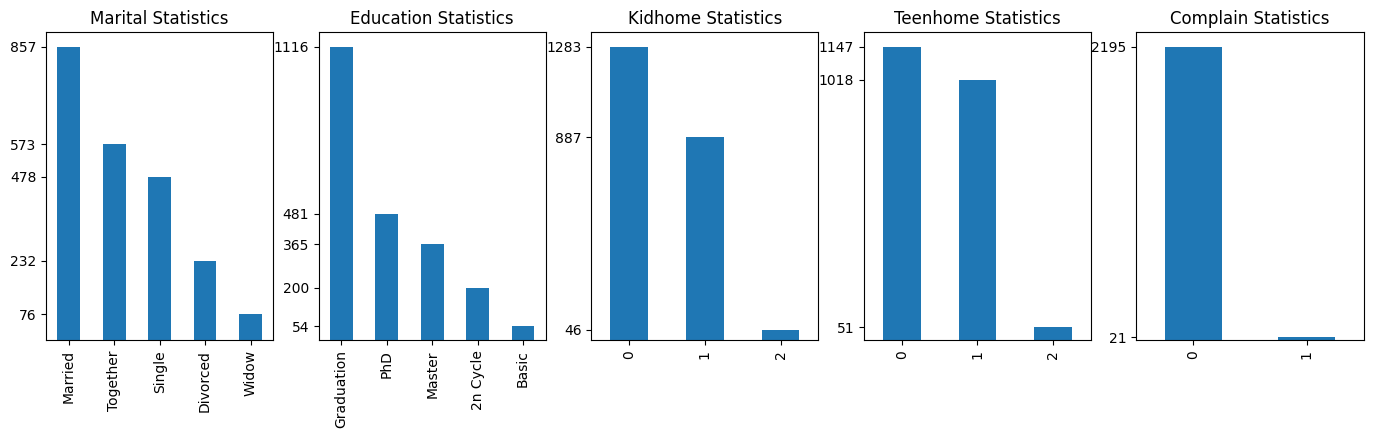

In [4]:
_, axes = plt.subplots(nrows=1, ncols=5)

vcounts = df['Marital_Status'].value_counts()
vcounts.plot(kind='bar', title='Marital Statistics', yticks=vcounts, ax=axes[0], figsize=(17,4))

vcounts = df['Education'].value_counts()
vcounts.plot(kind='bar', title='Education Statistics', yticks=vcounts, ax=axes[1])

vcounts = df['Kidhome'].value_counts()
vcounts.plot(kind='bar', title='Kidhome Statistics', yticks=vcounts, ax=axes[2])

vcounts = df['Teenhome'].value_counts()
vcounts.plot(kind='bar', title='Teenhome Statistics', yticks=vcounts, ax=axes[3])

vcounts = df['Complain'].value_counts()
vcounts.plot(kind='bar', title='Complain Statistics', yticks=vcounts, ax=axes[4])

Και ανάλογα με scatter plots και boxplots τις στήλες που δεν έχουν standar τιμές αλλά κυμαίνονται σε ένα μεγαλύτερο εύρος τιμών

Text(0.5, 1.0, 'Recency Statistics')

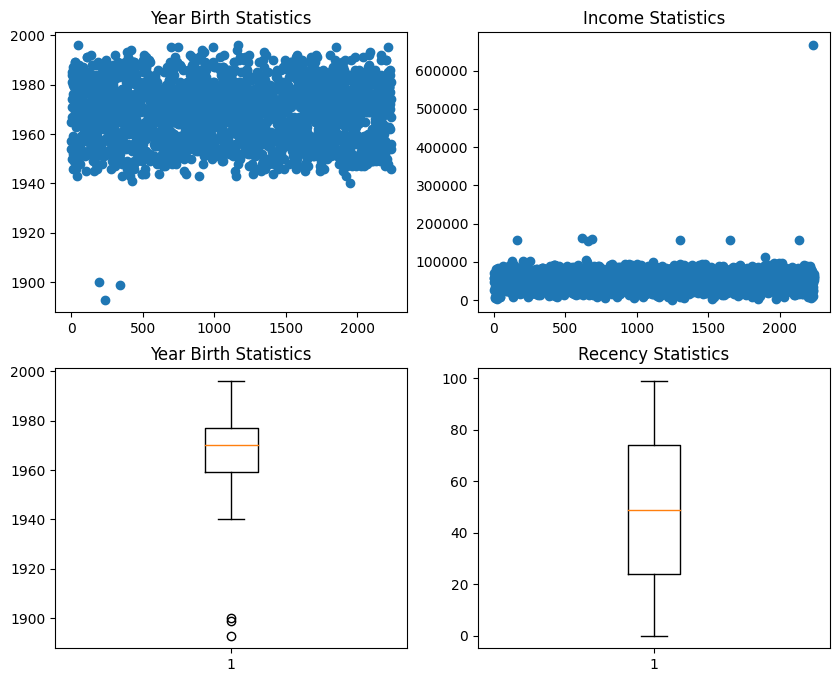

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=((10, 8)))

axes[0][0].scatter(df['Year_Birth'].index, df['Year_Birth'].values)
axes[0][0].set_title('Year Birth Statistics')

axes[0][1].scatter(df['Income'].index, df['Income'].values)
axes[0][1].set_title('Income Statistics')

axes[1][0].boxplot(df['Year_Birth'])
axes[1][0].set_title('Year Birth Statistics')

axes[1][1].boxplot(df['Recency'])
axes[1][1].set_title('Recency Statistics')

Μπορούμε να παρατηρήσουμε ότι υπάρχουν outliers τα οποία θα πρέπει να αφαιρεθούν στη συνέχεια

### Ζητούμενο 3

In [6]:
#A)
def createCustomerFor(todayDate):
  if 'Customer_For' in df.columns:
    df.drop(columns=['Customer_For'], inplace=True)
  
  customerFor = []
  for dateOfEnrollment, daysFromLastBuy in zip(df['Dt_Customer'], df['Recency']):
    customerFor.append((todayDate - dateOfEnrollment).days - daysFromLastBuy)
  df.insert(0, 'Customer_For', customerFor)

#B)
def createAge(todayYear):
  if 'Age' in df.columns:
    df.drop(columns=['Age'], inplace=True)

  ages = []
  for yearOfBirth in df['Year_Birth'].values:
    ages.append(todayYear - yearOfBirth)
  df.insert(0, 'Age', ages)

#C)
def createSpent():
  if 'Spent' in df.columns:
    df.drop(columns=['Spent'], inplace=True)

  mntSpent = []
  for wines, fruits, meatProducts, fishProducts, sweetProducts, goldProducts in zip(df['MntWines'], df['MntFruits'], 
  df['MntMeatProducts'], df['MntFishProducts'], df['MntSweetProducts'], df['MntGoldProds']):
    mntSpent.append(wines + fruits + meatProducts + fishProducts + sweetProducts + goldProducts)
  df.insert(0, 'Spent', mntSpent)   

#D)
def createChildren():
  if 'Children' in df.columns:
    df.drop(columns=['Children'], inplace=True)
  
  nchildren = []
  for kids, teens in zip(df['Kidhome'], df['Teenhome']):
    nchildren.append(kids + teens)
  df.insert(0, 'Children', nchildren)

#E)
def createFamilySize():
  if 'FamilySize' in df.columns:
    df.drop(columns=['FamilySize'], inplace=True)
  
  familySize = []
  for kids, teens, status in zip(df['Kidhome'], df['Teenhome'], df['Marital_Status']):
    if status in ['Married', 'Together']:
      familySize.append(kids + teens + 2)
    else:
      familySize.append(kids + teens + 1)
  df.insert(0, 'FamilySize', familySize)

#F)
def createIsParent():
  if 'IsParent' in df.columns:
    df.drop(columns=['IsParent'], inplace=True)
  
  status = []
  for number in df['Children']:
    if number > 0:
      status.append(1)
    else:
      status.append(0)
  df.insert(0, 'IsParent', status)

#G)
def createLivingWiht():
  if 'Living_With' in df.columns:
    df.drop(columns=['Living_With'], inplace=True)
  
  status = []
  for maritalStatus in df['Marital_Status']:
    if maritalStatus in ['Married', 'Together']:
      status.append('Parther')
    else:
      status.append('Alone')
  df.insert(0, 'Living_With', status)

#H)
def createAgeGroup():
  if 'Age_Group' in df.columns:
    df.drop(columns=['Age_Group'], inplace=True)
  
  group = []
  for age in df['Age']:
    if 21 < age and  age < 30:
      group.append('21-30')
    elif 31 < age and  age < 40:
      group.append('31-40')
    elif 41 < age and  age < 50:
      group.append('41-50')
    elif 51 < age and  age < 60:
      group.append('51-60')
    else:
      group.append('61-70')
  df.insert(0, 'Age_Group', group)

In [7]:
today = pd.to_datetime('today').normalize()
year = datetime.date.today().year

createCustomerFor(today)
createAge(year)
createSpent()
createChildren()
createFamilySize()
createIsParent()
createLivingWiht()
createAgeGroup()

### Ζητούμενο 4

In [8]:
old_shape = df.shape

for column in ['FamilySize', 'Children', 'Spent', 'Age', 'Customer_For','Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
              'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']:

  mean = df[column].mean()
  std_dev = df[column].std()
  cut_off = std_dev * 3
  lower, upper = mean - cut_off, mean + cut_off
  df = df[(df[column] > lower) & (df[column] < upper)]

print('Shape before removing the outliers = ' + str(old_shape) + ' and after ' + str(df.shape))


Shape before removing the outliers = (2216, 37) and after (1831, 37)


### Ζητούμενο 5

In [9]:
#we remove the categorical characteristics
dfHeatmap = df.drop(['Age_Group', 'Living_With', 'IsParent', 'ID', 'Year_Birth', 'Education', 
                      'Marital_Status', 'Dt_Customer'], axis=1)
dfHeatmap.style.background_gradient(cmap='Blues')

### Ζητούμενο 6

**Σημείωση** Τα παρακάτω δεδομένα είναι μετά από την αφαίρεση των *outliers*

#### 1)

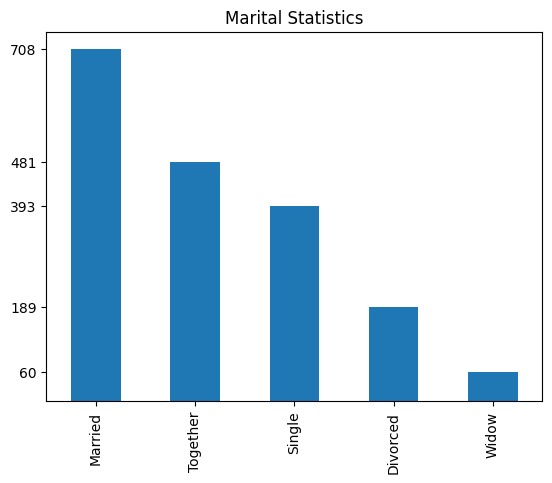

In [10]:
vcounts = df['Marital_Status'].value_counts()
plot = vcounts.plot(kind='bar', title='Marital Statistics', yticks=vcounts)

Παρατηρούμε ότι στην κατηγορία "Married" ανήκει το μεγαλύτερο ποσοστό πελατών

#### 2)

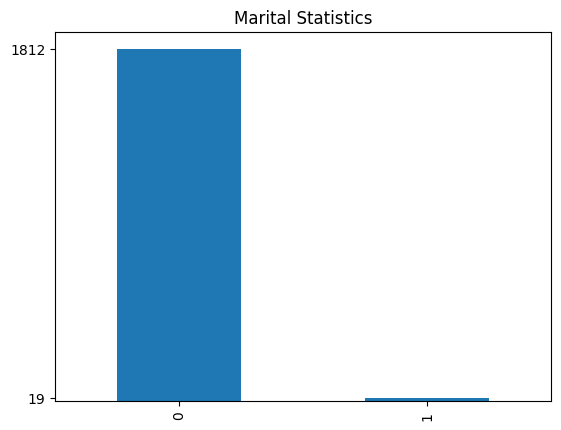

In [11]:
vcounts = df['Complain'].value_counts()
plot = vcounts.plot(kind='bar', title='Marital Statistics', yticks=vcounts)

Όπως φαίνεται και στο διάγραμμα, 19 άτομα έχουν κάνει complain

#### 3)

<Axes: title={'center': 'Marital Statistics'}>

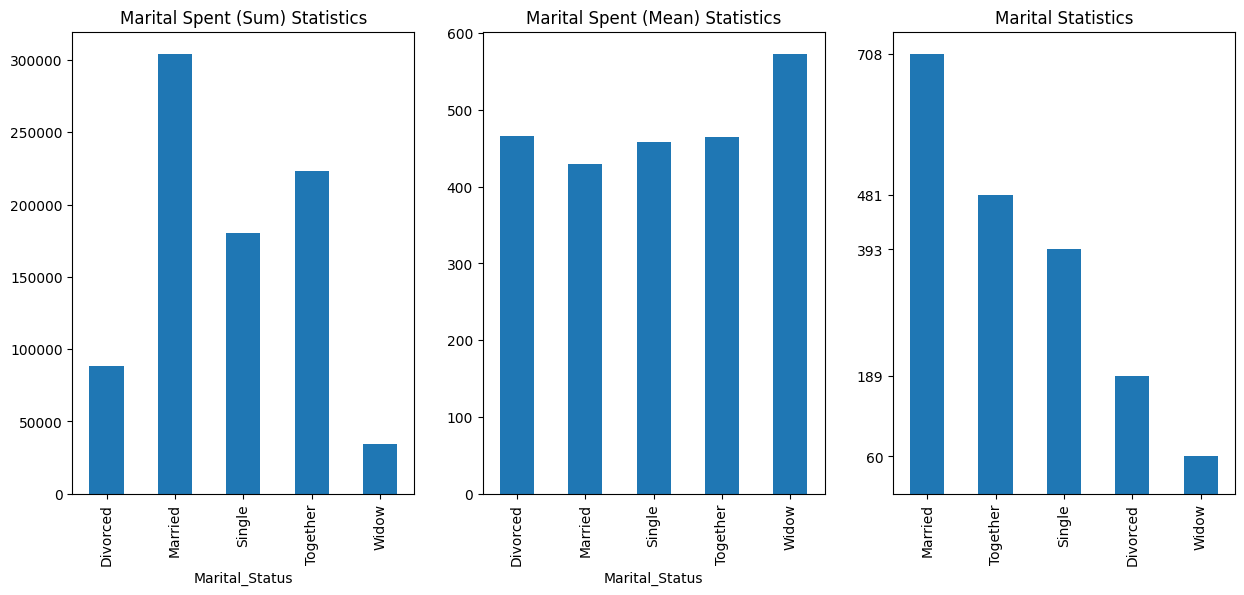

In [12]:
_, axes = plt.subplots(nrows=1, ncols=3)

dfCorrelation = df[['Spent', 'Marital_Status']].groupby('Marital_Status')['Spent'].sum()
dfCorrelation.plot(kind='bar', title='Marital Spent (Sum) Statistics', ax=axes[0], figsize=(15,6))

dfCorrelation = df[['Spent', 'Marital_Status']].groupby('Marital_Status')['Spent'].mean()
dfCorrelation.plot(kind='bar', title='Marital Spent (Mean) Statistics', ax=axes[1])

vcounts = df['Marital_Status'].value_counts()
vcounts.plot(kind='bar', title='Marital Statistics', yticks=vcounts, ax=axes[2])

Αρχικά ξέρουμε ότι οι πελάτες στη Married κατηγορία είναι οι περισσότεροι. Αυτό φαίνεται να έχει ως αποτέλεσμα οι καταναλωτές αυτής της κατηγορίας να ξεδεύουν συνολικά τα περισσότερα. Παρόλλα αυτά στο μεσαίο διάγραμμα διακρίνουμε ότι το μέσο χρηματικό ποσό είναι παρόμοιο σε κάθε κατηγορία.

#### 5)

<Axes: title={'center': 'Age Group Statistics'}>

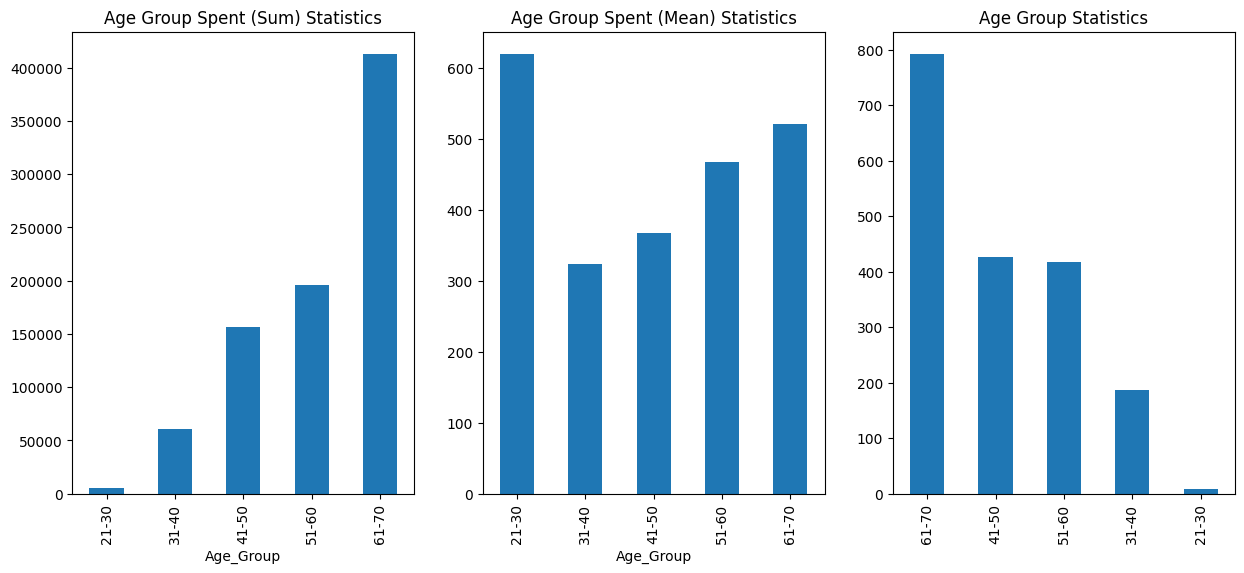

In [13]:
_, axes = plt.subplots(nrows=1, ncols=3)

dfCorrelation = df[['Age_Group', 'Spent']].groupby('Age_Group')['Spent'].sum()
dfCorrelation.plot(kind='bar',  title='Age Group Spent (Sum) Statistics', ax=axes[0], figsize=(15,6))

dfCorrelation = df[['Age_Group', 'Spent']].groupby('Age_Group')['Spent'].mean()
dfCorrelation.plot(kind='bar',  title='Age Group Spent (Mean) Statistics', ax=axes[1])

vcounts = df['Age_Group'].value_counts()
vcounts.plot(kind='bar', title='Age Group Statistics', ax=axes[2])

Βλέπουμε ότι οι πελάτες στην ηλικιακή ομάδα 61-70 είναι οι περισσότεροι. Αυτό φαίνεται να έχει ως αποτέλεσμα οι καταναλωτές αυτής της κατηγορίας να ξεδεύουν αθροιστικά τα περισσότερα χρήματα σε σχέση με τις άλλες κατηγορίες. Στο μεσαίο διάγραμμα φαίνεται ότι το μέσο χρηματικό ποσό είναι παρόμοιο στις κατηγορίες 21-30 / 51-60 / 61-70. Ενώ οι κατηγορίες 31-40 / 41-50 φαίνεται να έχουν σαφώς μικρότερα μέσα έξοδα.

#### 6)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='Income', ylabel='Spent'>

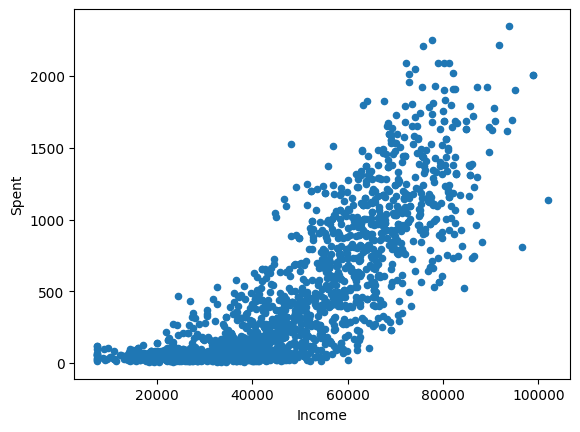

In [14]:
dfCorrelation = df[['Income', 'Spent']]
dfCorrelation.plot(x='Income', y='Spent', kind='scatter')

Φαίνεται στο διάγραμμα πως όσο αυξάνεται το εισόδημα αυξάνεται και το ποσό των αγορών. Οπότε εδώ υπάρχει μια γραμμική σχέση μεταξύ των δύο στηλών.

#### 7)

<Axes: title={'center': 'Education Statistics'}>

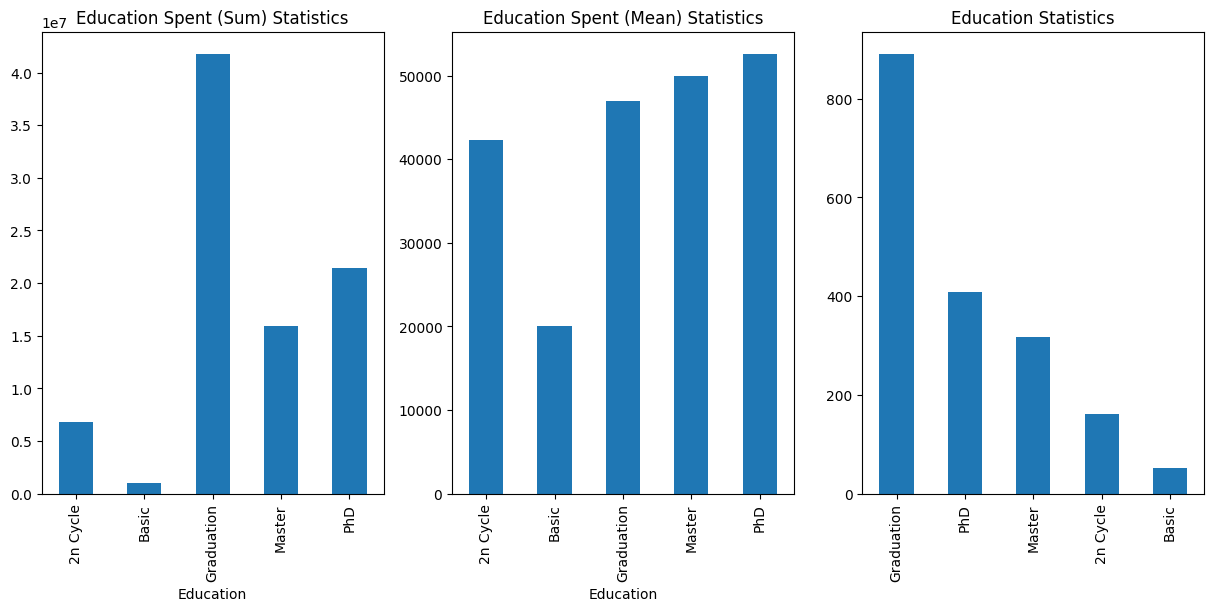

In [15]:
_, axes = plt.subplots(nrows=1, ncols=3)

dfCorrelation = df[['Education', 'Income']].groupby('Education')['Income'].sum()
dfCorrelation.plot(kind='bar', title='Education Spent (Sum) Statistics', ax=axes[0], figsize=(15,6))

dfCorrelation = df[['Education', 'Income']].groupby('Education')['Income'].mean()
dfCorrelation.plot(kind='bar', title='Education Spent (Mean) Statistics', ax=axes[1], figsize=(15,6))

vcounts = df['Education'].value_counts()
vcounts.plot(kind='bar', title='Education Statistics', ax=axes[2])

Στο dataset φαίνεται ότι σχεδόν οι μισοί καταναλωτές είναι Graduation επιπέδου και ότι τα περισσότερα έσοδα προέρχοναι από αυτή την ομάδα. Παρόλο αυτά τα μέσα έσοδα κάθε κατηγορίας φαίνεται να είναι στην ίδια κλίμακα εκτός από αυτών που έχουν basic εκπαίδευση που είναι αρκετά μικρότερα.

#### 8)

<Axes: xlabel='FamilySize'>

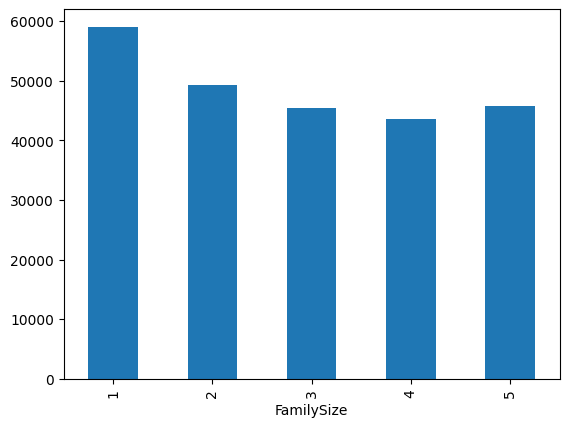

In [16]:
dfCorrelation = df[['FamilySize', 'Income']]
dfCorrelation = dfCorrelation.groupby('FamilySize')['Income'].mean()
dfCorrelation.plot(kind='bar')

Θα περιμέναμε οι οικογένειες με περισσότερα παιδιά να έχουν και υψηλότερο εισόδημα. Ομως φαίνεται ότι οι πελάτες που ανήκουν στην κατηγορία alone είναι με τα υψηλότερο μέσο εισόδημα και αμέσως μετά οι οικογένειες με 2 και 5 άτομα.

#### 9)

<Axes: xlabel='Children'>

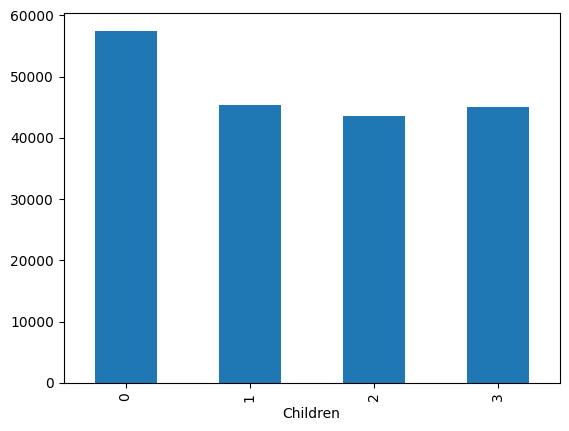

In [17]:
dfCorrelation = df[['Children', 'Income']]
dfCorrelation = dfCorrelation.groupby('Children')['Income'].mean()
dfCorrelation.plot(kind='bar')

Έχουμε τα ίδια αποτελέσματα με το προηγούμενο διάγραμμα. Όπου οι χωρίς παιδιά φαίνεται να έχουν το υψηλότερο εισόδημα.

#### 13

In [18]:
dfPerc = df[(df["AcceptedCmp1"] == 1) & (df["AcceptedCmp2"] == 1) & (df["AcceptedCmp3"] == 1) & (df["AcceptedCmp4"] == 1) & (df["AcceptedCmp5"] == 1)]
print(dfPerc.shape)

(0, 37)


Παρατηρούμε ότι κανένας πελάτης δεν έχει δεχθεί όλες τις προσφορές

#### 14 / 15 / 16 / 17

Text(0.5, 1.0, 'FamilySize')

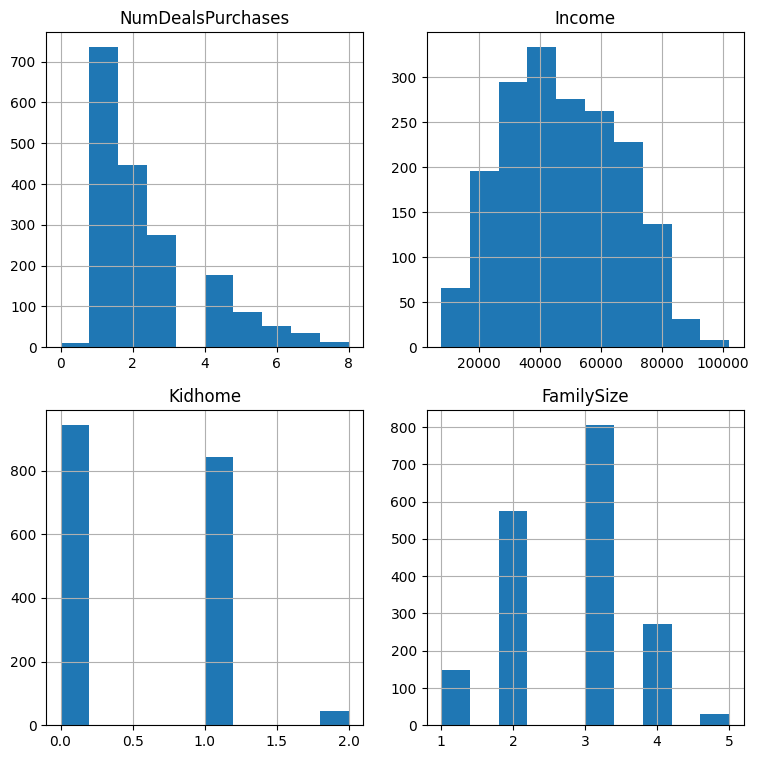

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9,9))
df['NumDealsPurchases'].hist(ax=axes[0][0])
axes[0][0].set_title('NumDealsPurchases')

df["Income"].hist(ax=axes[0][1])
axes[0][1].set_title('Income')

df["Kidhome"].hist(ax=axes[1][0])
axes[1][0].set_title('Kidhome')

df["FamilySize"].hist(ax=axes[1][1])
axes[1][1].set_title('FamilySize')

### Ζητούμενο 7

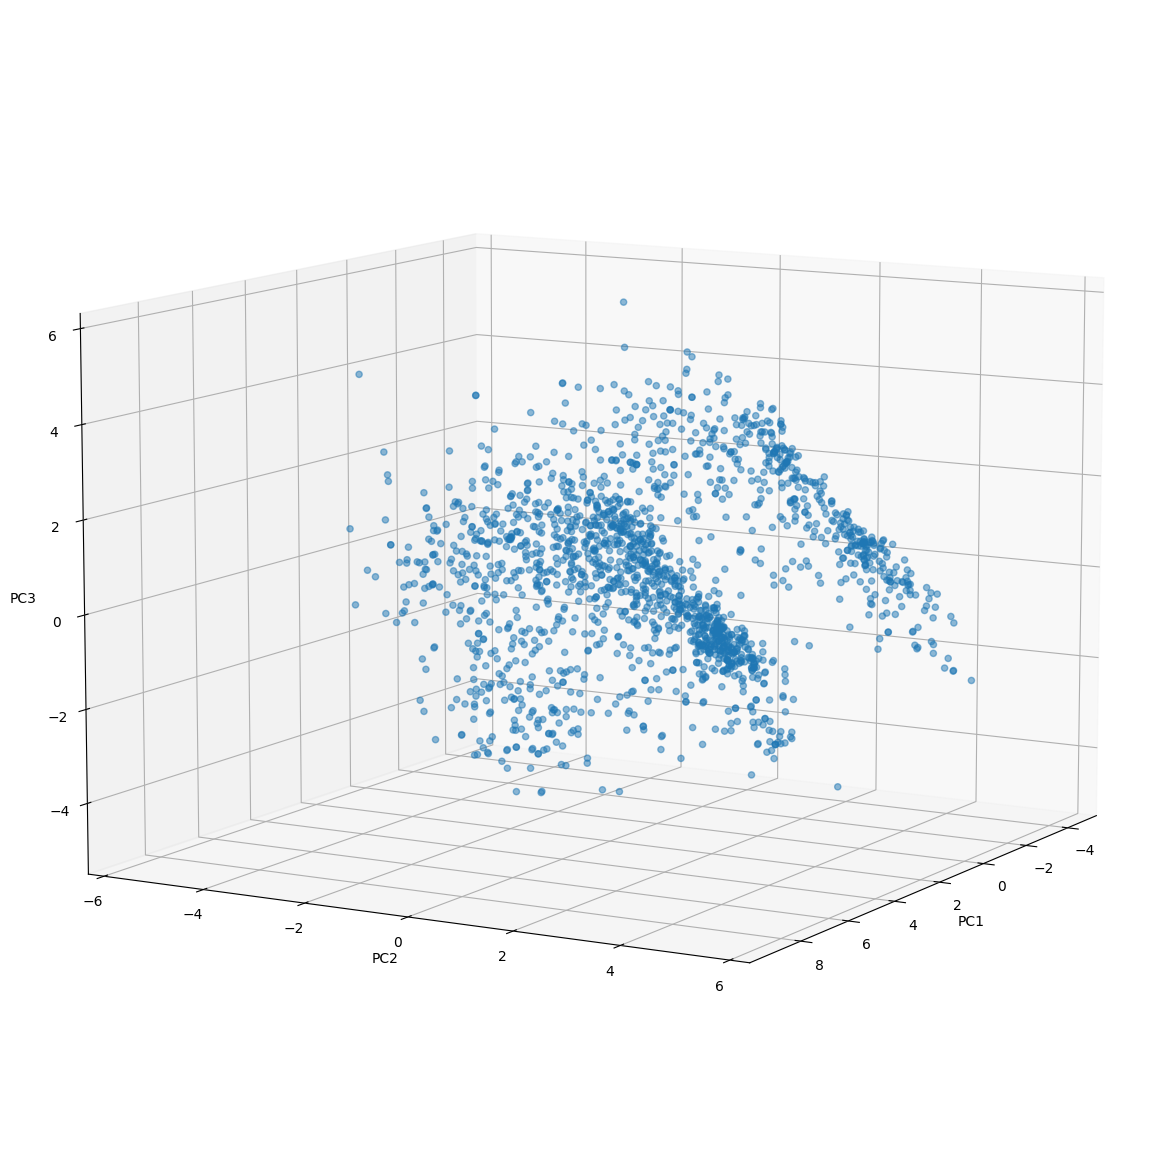

In [20]:
#one hot encoding using get dummies form pd
one_hot_encoded_data = pd.get_dummies(df, columns = ['Education', 'Marital_Status', 'Living_With'])

#one hot encoding using sklearn
#enc = OneHotEncoder(handle_unknown='ignore')
#enc_df = pd.DataFrame(enc.fit_transform(df[['Education', 'Marital_Status', 'Living_With']]).toarray())

#drop the colums about campaigns / complain / response /non-numerical
df_copy = one_hot_encoded_data.drop(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
'AcceptedCmp2', 'Complain', 'Response', 'Age_Group', 'Dt_Customer'], axis=1)

#Standardize
scaler = StandardScaler()
df_copy = scaler.fit_transform(df_copy)

#PCA
pca = PCA(n_components=3)
pca = pca.fit_transform(df_copy)

# Create a 3D scatter plot
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca[:, 0], pca[:, 1], pca[:, 2], alpha=0.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.view_init(azim=30, elev=10)
plt.show()

### Ζητούμενο 8

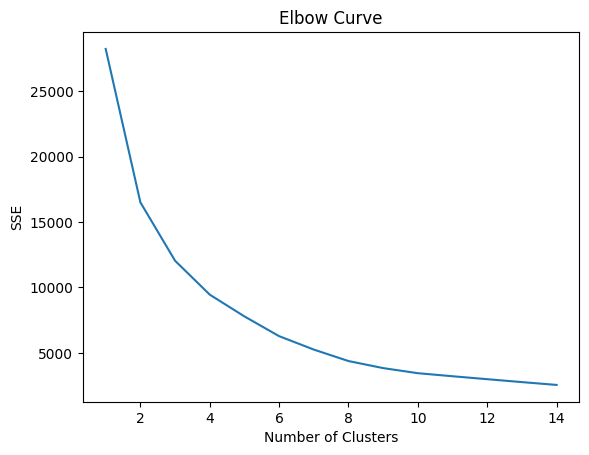

In [21]:
#ELBOW Method
sse = []
for num_clusters in range(1, 15):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(pca)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 15), sse)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

Από το γράφημα φαίνεται ότι πρέπει να σχηματιστούν 6 συστάδες

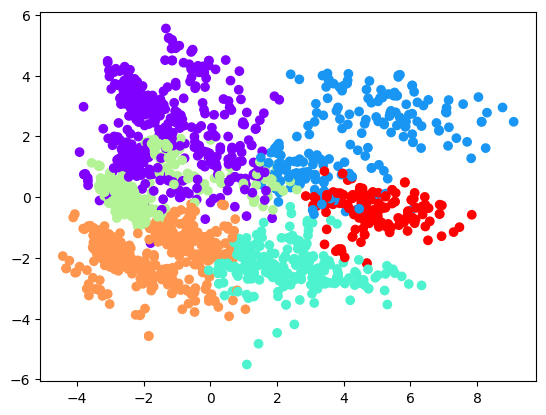

In [22]:
#Using Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=6)
agg_clustering.fit(pca)

#plot the clusters
labels = agg_clustering.labels_
plt.scatter(pca[:, 0], pca[:, 1], c=labels, cmap='rainbow')

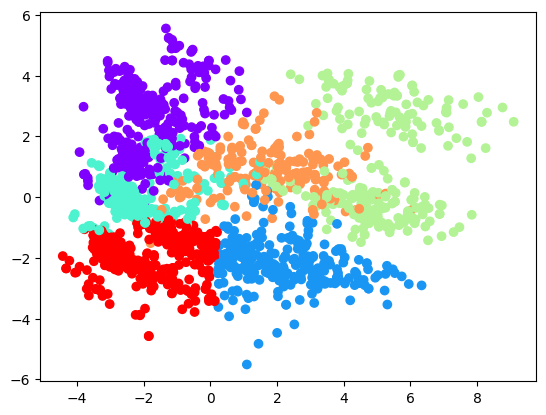

In [23]:
#Using Kmeans Clustering
kmeans = KMeans(n_clusters= 6, n_init=10, random_state=42) 
kmeans.fit(pca)

#plot the clusters
labels = kmeans.labels_
plt.scatter(pca[:, 0], pca[:, 1], c=labels, cmap='rainbow')

### Bonus

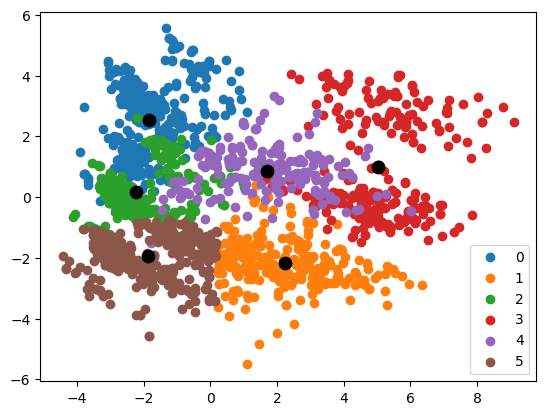

In [24]:
centers = kmeans.cluster_centers_

#plot the clusters with centers and labels
for i in range(kmeans.n_clusters):
    plt.scatter(pca[labels == i , 0] , pca[labels == i , 1] , label = i)
plt.scatter(centers[:,0] , centers[:,1] , s = 80, color = 'k')

plt.legend()
plt.show()

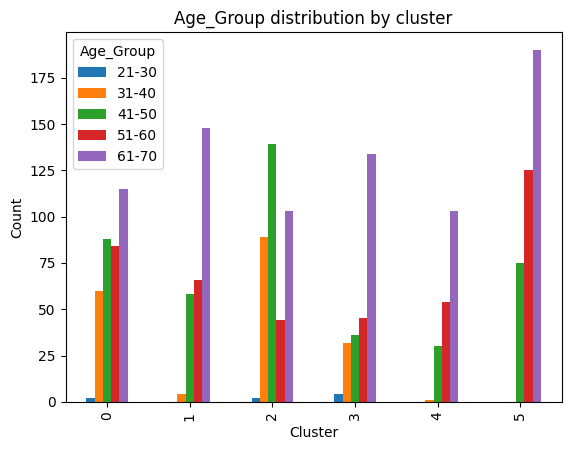

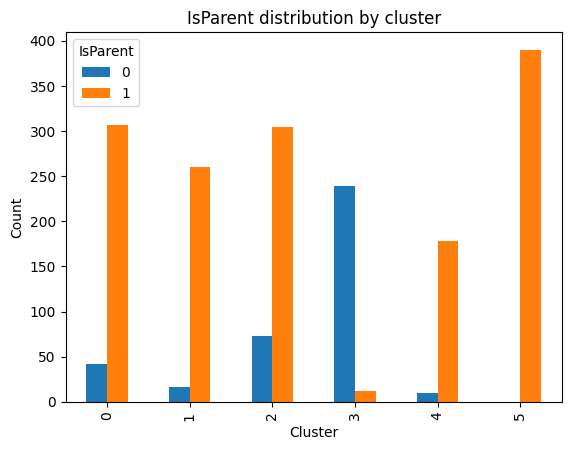

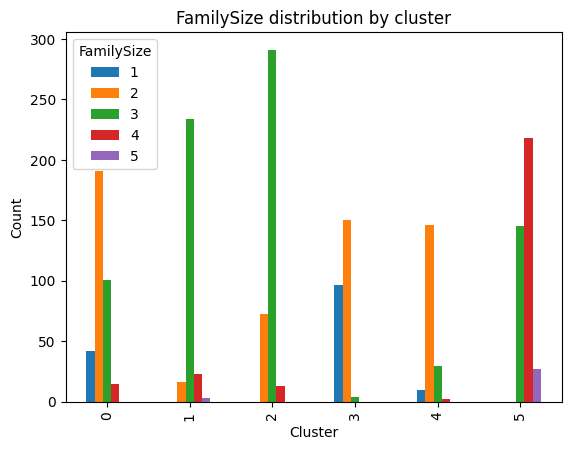

In [25]:
df['cluster'] = labels

# count the number of data points in each cluster
counts = df['cluster'].value_counts()

for col in ['Age_Group', 'IsParent', 'FamilySize']:
  grouped = df.groupby('cluster')[col].value_counts().unstack()
  grouped.plot(kind='bar')
  plt.xlabel('Cluster')
  plt.ylabel('Count')
  plt.title(f'{col} distribution by cluster')
  plt.show()

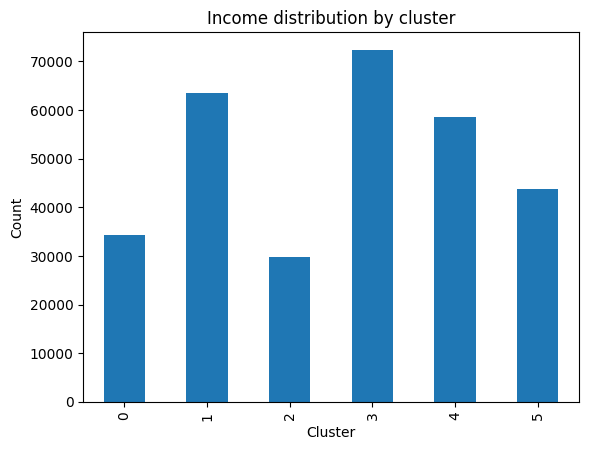

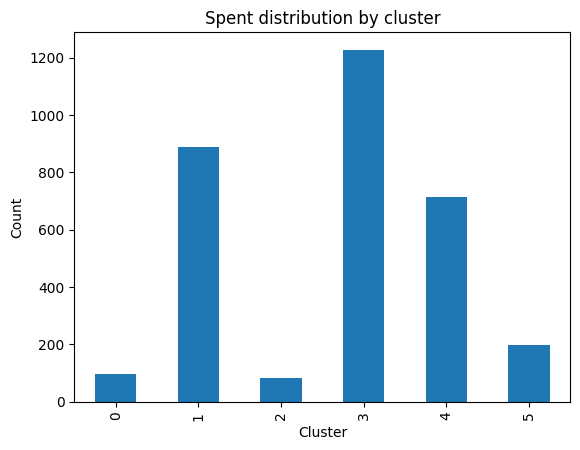

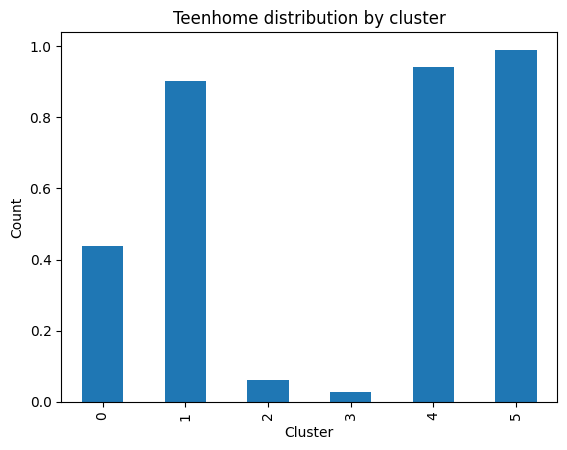

In [26]:
for col in ['Income', 'Spent', 'Teenhome']:
  grouped = df.groupby('cluster')[col].mean()
  grouped.plot(kind='bar')
  plt.xlabel('Cluster')
  plt.ylabel('Count')
  plt.title(f'{col} distribution by cluster')
  plt.show()

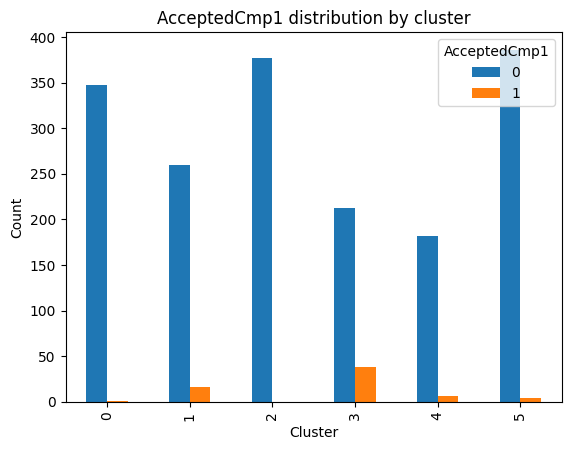

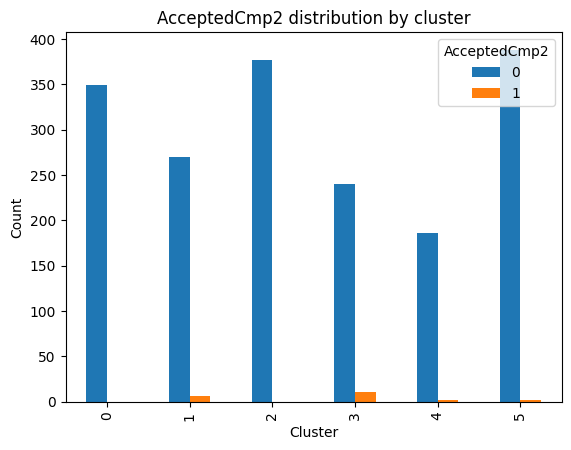

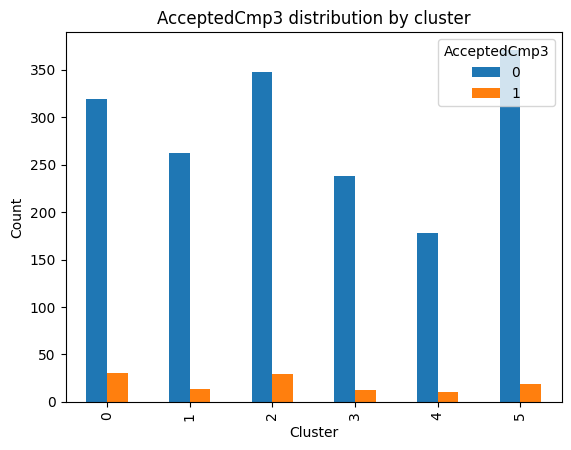

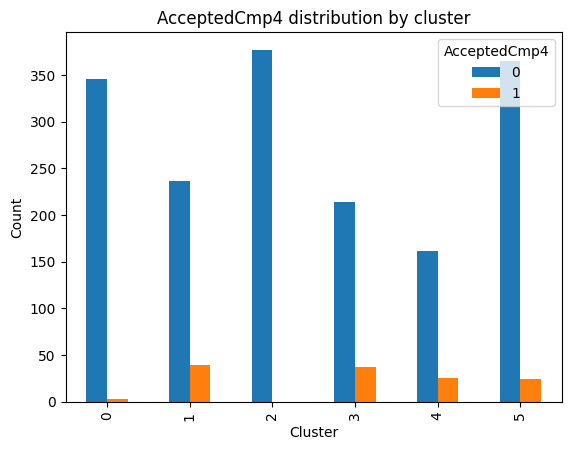

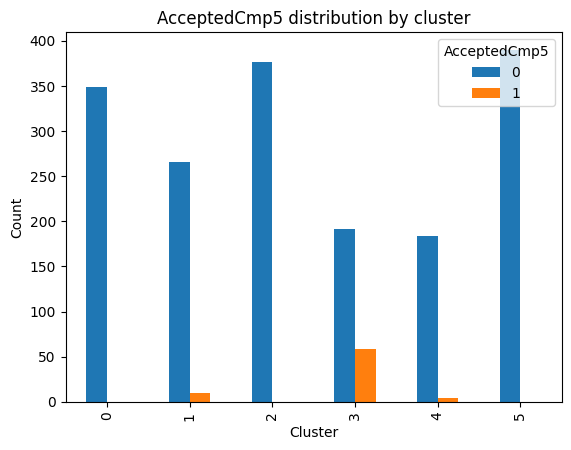

In [27]:
df['cluster'] = labels

# count the number of data points in each cluster
counts = df['cluster'].value_counts()

for col in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
  grouped = df.groupby('cluster')[col].value_counts().unstack()
  grouped.plot(kind='bar')
  plt.xlabel('Cluster')
  plt.ylabel('Count')
  plt.title(f'{col} distribution by cluster')
  plt.show()

Από τα διαγράμματα φαίνεται ότι:
 * Ξοδεύουν τα περισσότερα στο cluster 3
 * Ξοδεύουν τα λιγότερα στο cluster 2
 * Έχουν το υψηλότερο εισόδημα στο cluster 3
 * Έχουν το χαμηλότερο εισόδημα στο cluster 2
 * Τα cluster 2 και 3 δεν έχουν συνήθως έφηβους στο σπίτι
 * Τα cluster 4 και 5 έχουν συνήθως έφηβους στο σπίτι
 * Στο cluster 5 βρίσκονται οι πελάτες με τις περισσότερες υψηλότερες ηλικίες
 * Στο cluster 3 οι περισσότεροι δεν είναι γονείς
 * Στα cluster 1,3,4 υπήρχαν πελάτες που ανταποκρίθηκαν σε κάθε προωθητική ενέργεια
